# 임포트

In [1]:
import numpy as np
import pandas as pd
import ast

# 데이터 확인

In [2]:
data = pd.read_csv('airbnbmark1.csv', dtype={
        'host_acceptance_rate':str,
        'weekly_price':str,
        'monthly_price':str,
        'license':str,
        'jurisdiction_names':str,
        }
    )
data.shape

(153254, 106)

In [3]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20200212052319,2020-02-12,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.39
1,3831,https://www.airbnb.com/rooms/3831,20200212052319,2020-02-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.69
2,5099,https://www.airbnb.com/rooms/5099,20200212052319,2020-02-12,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.59


In [4]:
data.describe()
# 아래 정보들은 object dtype을 가진 데이터는 포함하지 않으므로 주의
# 결측치가 있음을 확인 가능

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.532540e+05,1.532540e+05,0.0,0.0,0.0,1.532540e+05,153050.000000,153050.000000,153254.000000,153254.000000,...,119312.000000,119231.000000,119279.000000,119222.000000,119222.000000,153254.000000,153254.00000,153254.000000,153254.000000,122289.000000
mean,2.225193e+07,2.020021e+13,NaN,NaN,NaN,8.297160e+07,21.179536,21.179536,40.729086,-73.950828,...,9.279025,9.736109,9.742310,9.593817,9.383830,7.609159,5.85804,1.515921,0.137295,1.336353
std,1.293543e+07,8.583871e+07,NaN,NaN,NaN,9.537811e+07,146.649053,146.649053,0.054865,0.047666,...,1.083864,0.744320,0.760339,0.749935,0.934644,32.970765,32.41745,6.984752,1.287762,1.648065
min,2.060000e+03,2.020010e+13,NaN,NaN,NaN,2.259000e+03,0.000000,0.000000,40.499790,-74.244420,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,1.065982e+07,2.020010e+13,NaN,NaN,NaN,9.368118e+06,1.000000,1.000000,40.689700,-73.983160,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.00000,0.000000,0.000000,0.190000
50%,2.203224e+07,2.020021e+13,NaN,NaN,NaN,3.763366e+07,1.000000,1.000000,40.723360,-73.955150,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,0.000000,0.000000,0.690000
75%,3.432368e+07,2.020031e+13,NaN,NaN,NaN,1.365562e+08,2.000000,2.000000,40.763090,-73.934010,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.00000,1.000000,0.000000,2.000000
max,4.289272e+07,2.020031e+13,NaN,NaN,NaN,3.414399e+08,2345.000000,2345.000000,40.914290,-73.708400,...,10.000000,10.000000,10.000000,10.000000,10.000000,302.000000,302.00000,133.000000,34.000000,66.360000


In [5]:
# DtypeWarning: Columns (27,61,62,94,95) have mixed types.
# Specify dtype option on import or set low_memory=False.
data.iloc[:, [27,61,62,94,95]]

,host_acceptance_rate,weekly_price,monthly_price,license,jurisdiction_names
0,38%,"$1,995.00",NaN,NaN,NaN
1,96%,$575.00,"$2,100.00",NaN,NaN
2,71%,NaN,NaN,NaN,NaN
3,67%,NaN,NaN,NaN,NaN
4,100%,$470.00,NaN,NaN,NaN
...,...,...,...,...,...
153249,100%,NaN,NaN,NaN,NaN
153250,99%,NaN,NaN,NaN,NaN
153251,NaN,NaN,NaN,NaN,NaN
153252,100%,NaN,NaN,NaN,NaN


# 전처리

## 분석

### 전처리 또는 drop이 필요한 것들


* 하위 항목 분리 필요
  * host_verifications
  * amenities
* classify 필요
  * cancellation_pollicy
  
* 종속성 확인(street)
  * street
  * neightborhood
  * neighborhood_cleansed
  * neighborhood_group
  * city
  * state
  * zipcode
  * market
  * smart_location 종속성 확인

* $ 표기 제거
  * price
  * weekly_price
  * monthly_price
  * security_deposit
  * cleaning_fee
  * extra_people
* % 표기 제거
  * host_acceptance_rate
* 적합성 판단 필요
  * calendar_updated
  * calendar_last_scraped
  * is_location_exact 수상한 컬럼

* 날자 표기 통일
  * first_review
  * last_review

### drop한 것들과 그 사유


* 모든 값이 동일
  * experience_offered; 모든 값이 null
  * country; US
  * country_code; US
  * state
  * requires_license; f
  * is_business_travel_ready; f
  * has_availability; t
* 얻을 정보 없음
  * scrape_id
  * last_scraped; scrape 관련 메타정보, 얻을 정보가 없음.
  * url
    * listing_url
    * airbnb_url
    * thumbnail_url
    * medium_url
    * picture_url
    * xl_pictuere_url
    * host_thumbnail_url
    * host_picture_url
* 종속 & 너무 많은 결측치
  * jurisdiction_names

## Drop

In [6]:
column_to_drop = [
    'listing_url',
    'scrape_id',
    'last_scraped',
    'experiences_offered',
    'thumbnail_url',
    'medium_url',
    'picture_url',
    'xl_picture_url',
    'host_thumbnail_url',
    'host_picture_url',
    'country',
    'country_code',
    'requires_license',
    'is_business_travel_ready',
    'jurisdiction_names',
    'has_availability'
    ]
for column in column_to_drop:
    try:
        data = data.drop(column, axis='columns')
    except KeyError as e:
        print(e)

## 데이터 결측치/타입/오류 확인 및 제거

### 데이터 결측치 확인

In [7]:
count = len(data.id)
df_na_count = data.isna().sum()
df_na_rate = df_na_count / count
df_na = pd.concat([df_na_rate, df_na_count], axis=1)
df_na.columns = ['rate', 'count_na']
df_na['count_not_na'] = count - df_na['count_na']
df_na[df_na.count_na != 0].sort_values(by='rate', ascending=False)

,rate,count_na,count_not_na
license,0.999439,153168,86
square_feet,0.992490,152103,1151
monthly_price,0.906808,138972,14282
weekly_price,0.892655,136803,16451
notes,0.594764,91150,62104
host_acceptance_rate,0.517898,79370,73884
access,0.470128,72049,81205
interaction,0.403676,61865,91389
host_about,0.399050,61156,92098
house_rules,0.389393,59676,93578


### 너무 적은 데이터 제거
* license, square_Feet

In [8]:
data_not_na = data.loc[:, ['license', 'square_feet']]
data_not_na = data_not_na[~data_not_na.license.isna() | ~data_not_na.square_feet.isna()]
pd.concat([data_not_na.head(),data_not_na.tail()])

,license,square_feet
1,NaN,500.0
11,NaN,500.0
15,NaN,750.0
19,NaN,800.0
20,NaN,700.0
152960,46-4091213,NaN
152961,46-4091213,NaN
152962,46-4091213,NaN
152965,46-4091213,NaN
152966,46-4091213,NaN


In [9]:
data_not_na[~data_not_na.license.isna()]['license'].value_counts()

81-1092926                   12
46-4091213                   11
35-2593481                    9
83-2444556                    9
20-5909724                    9
20-5163086                    8
47-3886130                    6
11-3461723                    6
20-0976501                    6
HUTB-162541                   3
City registration pending     3
47-4365717                    2
83-1780849                    2
Name: license, dtype: int64

In [10]:
data_not_na[~data_not_na.square_feet.isna()]['square_feet'].value_counts()

0.0       93
1000.0    74
700.0     73
800.0     69
500.0     57
          ..
96.0       2
194.0      1
11.0       1
484.0      1
65.0       1
Name: square_feet, Length: 97, dtype: int64

In [11]:
column_to_drop = ['license, square_feet']
for column in column_to_drop:
    try:
        data = data.drop(column, axis=1)
    except KeyError as e:
        print(e)

"['license, square_feet'] not found in axis"


### 데이터 중복 확인

In [12]:
data.count()

id                                              153254
name                                            153203
summary                                         145973
space                                           110366
description                                     149687
                                                 ...  
calculated_host_listings_count                  153254
calculated_host_listings_count_entire_homes     153254
calculated_host_listings_count_private_rooms    153254
calculated_host_listings_count_shared_rooms     153254
reviews_per_month                               122289
Length: 90, dtype: int64

In [13]:
df_overlap_rate = pd.DataFrame(columns=['name', 'n_unique', 'not_na'])
for column in data:
    new_row = pd.Series({"name":column, "n_unique":data[column].value_counts().count(), "not_na":data[column].count(), "dtype":data[column].dtype}, name=column)
    df_overlap_rate.loc[len(df_overlap_rate)] = new_row
df_overlap_rate["average_count_per_unique"] = df_overlap_rate["not_na"] / df_overlap_rate["n_unique"]
df_overlap_rate[df_overlap_rate.n_unique < 50].sort_values(by='n_unique')

,name,n_unique,not_na,average_count_per_unique
83,require_guest_profile_picture,2,153254,76627.0
20,host_is_superhost,2,153050,76525.0
25,host_has_profile_pic,2,153050,76525.0
26,host_identity_verified,2,153050,76525.0
81,instant_bookable,2,153254,76627.0
84,require_guest_phone_verification,2,153254,76627.0
38,is_location_exact,2,153254,76627.0
40,room_type,4,153254,38313.5
17,host_response_time,4,97815,24453.75
30,neighbourhood_group_cleansed,5,153254,30650.8


In [14]:
for index, (name, n_unique, not_na, cpu) in df_overlap_rate.sort_values(by='n_unique').head(15).iterrows():
    print(name, n_unique, data[name].unique())

is_location_exact 2 ['f' 't']
require_guest_phone_verification 2 ['t' 'f']
require_guest_profile_picture 2 ['t' 'f']
instant_bookable 2 ['f' 't']
host_identity_verified 2 ['t' 'f' nan]
host_has_profile_pic 2 ['t' 'f' nan]
host_is_superhost 2 ['f' 't' nan]
host_response_time 4 ['within a day' 'within an hour' nan 'within a few hours'
 'a few days or more']
room_type 4 ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
neighbourhood_group_cleansed 5 ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
bed_type 5 ['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch']
cancellation_policy 6 ['strict_14_with_grace_period' 'moderate' 'flexible' 'strict'
 'super_strict_60' 'super_strict_30']
state 8 ['NY' nan 'ny' 'MP' 'CA' 'NJ' 'New York' 'Ny' 'FL']
calendar_last_scraped 8 ['2020-02-12' '2020-02-13' '2020-01-04' '2020-01-03' '2020-01-05'
 '2020-01-06' '2020-03-14' '2020-03-15']
review_scores_location 8 [10.  9. nan  8.  7.  6.  2.  4.  5.]


### Price류 $ 표기 제거, 숫자형으로 변환

In [15]:
data[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_acceptance_rate']]


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,host_acceptance_rate
0,$225.00,"$1,995.00",NaN,$350.00,$95.00,$0.00,38%
1,$89.00,$575.00,"$2,100.00",$500.00,NaN,$0.00,96%
2,$200.00,NaN,NaN,$300.00,$125.00,$100.00,71%
3,$60.00,NaN,NaN,$450.00,$0.00,$30.00,67%
4,$79.00,$470.00,NaN,NaN,$15.00,$12.00,100%
...,...,...,...,...,...,...,...
153249,$150.00,NaN,NaN,$0.00,$0.00,$0.00,100%
153250,$149.00,NaN,NaN,NaN,NaN,$0.00,99%
153251,$188.00,NaN,NaN,NaN,NaN,$0.00,NaN
153252,"$1,100.00",NaN,NaN,NaN,NaN,$0.00,100%


In [16]:
def dollar_price_to_float(x):
    if pd.isna(x):
        return x
    elif type(x) == float:
        return x
    else:
        assert type(x) == str
        x = x[1:].replace(',', '')
        return float(x)

dollars = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for column in dollars:
    data[column] = data[column].apply(dollar_price_to_float)

def percentage_to_float(x):
    if pd.isna(x):
        return x
    return float(x[:-1])

data['host_acceptance_rate'] = data['host_acceptance_rate'].apply(percentage_to_float)
data[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_acceptance_rate']]


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,host_acceptance_rate
0,225.0,1995.0,NaN,350.0,95.0,0.0,38.0
1,89.0,575.0,2100.0,500.0,NaN,0.0,96.0
2,200.0,NaN,NaN,300.0,125.0,100.0,71.0
3,60.0,NaN,NaN,450.0,0.0,30.0,67.0
4,79.0,470.0,NaN,NaN,15.0,12.0,100.0
...,...,...,...,...,...,...,...
153249,150.0,NaN,NaN,0.0,0.0,0.0,100.0
153250,149.0,NaN,NaN,NaN,NaN,0.0,99.0
153251,188.0,NaN,NaN,NaN,NaN,0.0,NaN
153252,1100.0,NaN,NaN,NaN,NaN,0.0,100.0


###  하위 분류 분리하기
  * host_verification
  * amenities

In [17]:
data[['host_verifications', 'amenities']]

,host_verifications,amenities
0,"['email', 'phone', 'reviews', 'offline_governm...","{TV,Wifi,""Air conditioning"",Kitchen,""Paid park..."
1,"['email', 'phone', 'reviews', 'kba']","{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
2,"['email', 'phone', 'reviews', 'jumio', 'govern...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
3,"['email', 'phone', 'facebook', 'reviews', 'off...","{Wifi,""Air conditioning"",Kitchen,""Pets live on..."
4,"['email', 'phone', 'facebook', 'reviews']","{TV,Wifi,""Air conditioning"",""Paid parking off ..."
...,...,...
153249,"['email', 'phone', 'offline_government_id', 's...","{Wifi,""Air conditioning"",Kitchen,Heating,""Smok..."
153250,"['email', 'phone', 'facebook', 'reviews', 'kba']","{Wifi,""Air conditioning"",Kitchen,Heating,""Smok..."
153251,"['email', 'phone', 'jumio', 'offline_governmen...","{Wifi,""Air conditioning"",Kitchen,""Pets allowed..."
153252,"['email', 'phone', 'offline_government_id', 'g...","{TV,Wifi,""Air conditioning"",Kitchen,""Free park..."


In [18]:
s = set()
for item in data['host_verifications']:
    new_list = ast.literal_eval(item)
    if new_list is not None:
        s = s.union(set(new_list))
print(len(s))
s

19


{'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie'}

In [19]:
s = set()
amenities_pool = []
for item in data['amenities']:
    if item == '{}':
        continue
    new_list = list(map(str.strip,item[1:-1].replace('"','').replace("'",'').split(',')))
    s = s.union(set(new_list))
    amenities_pool.append(list(new_list))
print(len(s))
amenities = s
s
amenities_pool

150


[['TV',
  'Wifi',
  'Air conditioning',
  'Kitchen',
  'Paid parking off premises',
  'Free street parking',
  'Heating',
  'Family/kid friendly',
  'Smoke detector',
  'Carbon monoxide detector',
  'Fire extinguisher',
  'Essentials',
  'Lock on bedroom door',
  'Hair dryer',
  'Iron',
  'Laptop friendly workspace',
  'Self check-in',
  'Keypad',
  'Private living room',
  'Bathtub',
  'Hot water',
  'Bed linens',
  'Extra pillows and blankets',
  'Ethernet connection',
  'Coffee maker',
  'Refrigerator',
  'Dishes and silverware',
  'Cooking basics',
  'Oven',
  'Stove',
  'Luggage dropoff allowed',
  'Long term stays allowed',
  'Cleaning before checkout'],
 ['TV',
  'Cable TV',
  'Internet',
  'Wifi',
  'Air conditioning',
  'Kitchen',
  'Pets allowed',
  'Free street parking',
  'Heating',
  'Family/kid friendly',
  'Smoke detector',
  'Carbon monoxide detector',
  'Fire extinguisher',
  'Essentials',
  'Shampoo',
  'Lock on bedroom door',
  '24-hour check-in',
  'Hangers',
  'Hai

* 문제
  * translation missing: en.hosting_amenity_*
    * 얘들이 뭔지 찾아볼 필요가 있다.
  * 각 컬럼별로 분리하기

### amenities를 column으로 추가하자


In [20]:
with open('columns.txt', 'wt') as f:
    for i in data.columns:
        print(i, end='\n', file=f)

In [21]:
with open('amenities.txt', 'wt') as f:
    for i in amenities:
        print(i, end='\n', file=f)

In [22]:
from tqdm import tqdm
amenity_df = pd.DataFrame(columns=list(amenities), index=range(len(data)), dtype='Int32').fillna(0)
amenity_dict = {item:index for index,item in enumerate(amenities)}
for index, items in tqdm(enumerate(amenities_pool)):
    for item in items:
        amenity_df.iat[index, amenity_dict[item]] = 1

152860it [01:24, 1813.41it/s]


In [23]:
amenity_df

,Ski-in/Ski-out,Dishes and silverware,Long term stays allowed,BBQ grill,Bathrobes,Private entrance,Lockbox,Internet,Accessible-height toilet,First aid kit,...,TV,Paid parking off premises,Table corner guards,Free parking on premises,Stair gates,Bed linens,Pool with pool hoist,Indoor fireplace,Other pet(s),Wheelchair accessible
0,0,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 추가: PCA 해 볼 필요가 있을까?

In [24]:
naam = np.array(amenity_df)
naam.shape

(153254, 150)

In [25]:
nnaam = naam - np.mean(naam, axis=0)
cov = nnaam.T @ nnaam / (naam.shape[1])
assert(cov.shape == (150,150))


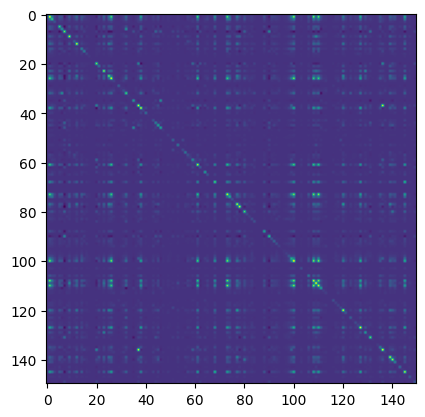

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow((cov * 100).astype(int))

In [27]:
u, v = np.linalg.eig(cov.astype(float))
u.shape, v.shape

((150,), (150, 150))

C:\Users\pc03\AppData\Local\Temp\ipykernel_8736\373069636.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  u = u.astype(float) #imaginary numbers are checked to be 0
C:\Users\pc03\AppData\Local\Temp\ipykernel_8736\373069636.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  v = v.astype(float)


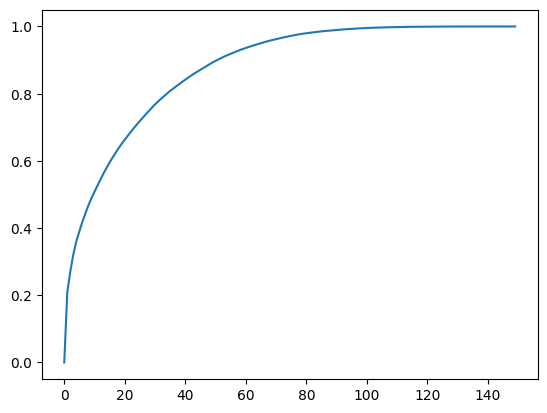

In [28]:
u = u.astype(float) #imaginary numbers are checked to be 0
v = v.astype(float)
x, y = [], []
for i in range(len(u)):
    x.append(i)
    y.append(u[:i].sum() / u.sum())
plt.plot(x, y)

In [29]:
np.array(y) >= 0.99
y[91]

0.9904355888667759

-> 결론: 91개 axis를 취하면 99% 이상의 설명도를 얻을 수 있다

In [30]:
amenity_dict
amenity_dict_reverse = {value:key for key, value in amenity_dict.items()}

In [31]:
amenity_dict_reverse

{0: 'Ski-in/Ski-out',
 1: 'Dishes and silverware',
 2: 'Long term stays allowed',
 3: 'BBQ grill',
 4: 'Bathrobes',
 5: 'Private entrance',
 6: 'Lockbox',
 7: 'Internet',
 8: 'Accessible-height toilet',
 9: 'First aid kit',
 10: 'EV charger',
 11: 'Trash can',
 12: 'Laptop friendly workspace',
 13: 'Body soap',
 14: 'Bathtub',
 15: 'Kitchen',
 16: 'Crib',
 17: 'Waterfront',
 18: 'Disabled parking spot',
 19: 'Turndown service',
 20: 'Elevator',
 21: 'Essentials',
 22: 'Shower chair',
 23: 'Carbon monoxide detector',
 24: 'Slippers',
 25: 'Hangers',
 26: 'Microwave',
 27: 'Wide hallways',
 28: 'Washer/Dryer',
 29: 'Smoking allowed',
 30: 'Wide clearance to shower',
 31: 'Well-lit path to entrance',
 32: 'Self check-in',
 33: 'Beach essentials',
 34: 'Bread maker',
 35: 'translation missing: en.hosting_amenity_49',
 36: 'toilet',
 37: 'Dryer',
 38: 'Free street parking',
 39: 'Smart lock',
 40: 'Other',
 41: 'Fixed grab bars for shower',
 42: 'Ceiling hoist',
 43: 'No stairs or steps to 

In [32]:
v[:, 0].argsort()

array([100,   1, 110, 108,  73,  26,  61, 127, 145,  38,  68, 120,  77,
         2,  99,  25,  12,  74, 139,  23,  32, 109,   9,   5,  14, 129,
       140, 106,  78, 135,  80,   6, 141,  88,  21,  45, 111,  11,  98,
        91, 121,   3,  92,  37, 123, 136,  57,  65,  43,  93,  31, 125,
        83,  15,  40, 126, 103,  53,  27, 118, 131, 117,  81,  94,  16,
        58,  64,  59, 112, 113,  82,  97,  76, 137,  39,  49, 147,  84,
       130,   8, 134,  47,  33,  44,  36,  30,  17,  96, 144,  79, 124,
       132,  10,  50, 142,  41, 128,  34, 119,  60, 143,  70,  54, 101,
        95,  18, 122,  22,  85,  56,  67,   0,  51, 133,  63, 148, 107,
        86,  66, 115, 105, 102, 104,  48,  13,  52,  89,   4, 114, 146,
        42, 138,  71,  19,  69,  72,  24,  87,  28, 116,  55,  75, 149,
        29,  46,  35,  62,  20,  90,   7], dtype=int64)

In [33]:
for i in range(10):
    for j in v[:, i].argsort()[:5]:
        print(amenity_dict_reverse[j], end='/')
    print()

Refrigerator/Dishes and silverware/Stove/Cooking basics/Oven/
Free street parking/Lock on bedroom door/Refrigerator/Dishes and silverware/Stove/
Oven/Stove/Cooking basics/Refrigerator/Washer/
Internet/Buzzer/wireless intercom/Family/kid friendly/Cable TV/translation missing: en.hosting_amenity_50/
Fire extinguisher/First aid kit/Carbon monoxide detector/Lock on bedroom door/Smoke detector/
TV/Cable TV/Private entrance/Bed linens/Self check-in/
Self check-in/Carbon monoxide detector/Lockbox/Fire extinguisher/Smoke detector/
Self check-in/Lockbox/Free street parking/Luggage dropoff allowed/Family/kid friendly/
translation missing: en.hosting_amenity_49/translation missing: en.hosting_amenity_50/TV/Lock on bedroom door/Self check-in/
Fire extinguisher/Laptop friendly workspace/First aid kit/Bed linens/translation missing: en.hosting_amenity_49/


-> 그러나, PCA를 통해 얻은 축과 각 amenity 사이의 연관도를 얻기는 어려웠음.
하나의 축이 90% 이상의 설명도를 가졌다면 어땠을까 싶기도 하지만.

In [34]:
data_with_amenity = pd.concat([data, amenity_df], axis=1)
data_with_amenity.drop(columns=['amenities'])

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,TV,Paid parking off premises,Table corner guards,Free parking on premises,Stair gates,Bed linens,Pool with pool hoist,Indoor fireplace,Other pet(s),Wheelchair accessible
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,...,1,1,0,0,0,1,0,0,0,0
1,3831,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...","We'll be around, but since you have the top fl...",...,1,0,0,0,1,0,0,0,0,0
2,5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,My neighborhood in Midtown East is called Murr...,Read My Full Listing For All Information. New ...,From the apartment is a 10 minute walk to Gran...,I will meet you upon arrival.,I usually check in with guests via text or ema...,...,1,0,0,0,0,1,0,0,0,0
3,5121,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"You will use one large, furnished, private roo...",Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Reservation should be made at least a few days...,NaN,Bathroom is shared with the host but the kitch...,NaN,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153249,42890680,NYC Best Location Minutes to Times Square!,Get to Time Square in minutes! New York can b...,"My bedroom is not a big as it seems to be, it ...",Get to Time Square in minutes! New York can b...,"Located in the heart of Harlem, conveniently l...",NaN,NaN,NaN,Any time,...,0,0,0,0,0,0,0,0,0,0
153250,42890730,New York Oasis,Cozy studio in the center of Manhattan. Close ...,Best deal in the city!!!,Cozy studio in the center of Manhattan. Close ...,Centrally located in New York City for all you...,NaN,Bus stop outside on 57th St. Subway just a blo...,NaN,I am always available to answer questions and ...,...,0,0,0,0,0,0,0,0,0,0
153251,42891018,Beautiful West Village Apartment,Beautiful loft in the heart of the west villag...,NaN,Beautiful loft in the heart of the west villag...,"Close by restaurants, coffee shops, parks, min...",NaN,Subways available within blocks,NaN,Live in the City and available anytime for com...,...,0,0,0,0,0,0,0,0,0,0
153252,42891637,Brooklyn room for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### amenity마다 개수를 세자. 너무 빈도가 낮은/높은 amenity 찾기

In [80]:
from IPython.display import display
#pd.options.display.max_rows = None

amenity_ratio = pd.concat([amenity_df.sum(axis=0), amenity_df.sum(axis=0)/amenity_df.shape[0]], axis=1)
amenity_ratio.columns = ['sum', 'ratio']
display(amenity_ratio.sort_values(by='ratio'))
pd.options.display.max_rows = 30

,sum,ratio
Snacks,1,0.000007
Ceiling hoist,3,0.000020
Turndown service,4,0.000026
Pool with pool hoist,5,0.000033
Kitchenette,7,0.000046
Record player,8,0.000052
Slippers,10,0.000065
Mobile hoist,10,0.000065
Mini bar,10,0.000065
Mini fridge,12,0.000078
